In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\mashroom_dataset\cleaned_dataset_mashroom.csv")

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# X and y

In [7]:
X = df.drop(columns = ['class'])
y = df['class']

# Train_test_split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= True)

# XGBoost

**Applying Hyperparameter tuning for identifying best parameters for xgboost**

In [9]:
# !pip install xgboost


In [10]:
from sklearn.model_selection import GridSearchCV

# modelling

from xgboost import XGBClassifier

estimator_xgb = XGBClassifier()

# parameters grid
param_grid_xgb = {"n_estimators" : [1,5,10,20],
                  'max_depth': [3,4,5],
                'gamma' : [0.1, 0.15, 0.3, 0.5, 1]}

# grid search
grid_xgb = GridSearchCV(estimator_xgb, param_grid_xgb, cv = 5, scoring = 'accuracy')
grid_xgb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_xgb.best_params_

{'gamma': 0.1, 'max_depth': 3, 'n_estimators': 20}

# XGB Model imortant features

In [11]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                        index = X.columns,
                        columns=['Importance'])
imp_features_list_xgb = feats_xgb[feats_xgb['Importance'] > 0].index.to_list()
imp_features_list_xgb

['cap-surface',
 'cap-color',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'spore-print-color',
 'population']

# Xtreme GradientBoost with important features and best hyperparameters

In [12]:
X_imp_xgb = X[imp_features_list_xgb]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_imp_xgb, y, test_size = 0.2,
                                                                   random_state = True)

# modelling
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma = 0.1, max_depth = 3, n_estimators = 20)
xgb.fit(X_train_xgb, y_train_xgb)

#Evaluation train data
from sklearn.metrics import accuracy_score
ypred_train = xgb.predict(X_train_xgb)
print("Train accuracy : ", accuracy_score(y_train_xgb, ypred_train))

# Cross_val_score
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(xgb, X_train_xgb, y_train_xgb, cv = 5).mean())

#Evaluation test data
ypred_test = xgb.predict(X_test_xgb)
print("Test accuracy : ", accuracy_score(y_test_xgb, ypred_test))


Train accuracy :  0.9995383905216187
cross_val_score :  0.9995384615384616
Test accuracy :  0.9969230769230769


In [13]:
%%timeit
xgb.fit(X_train_xgb, y_train_xgb)


46.9 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


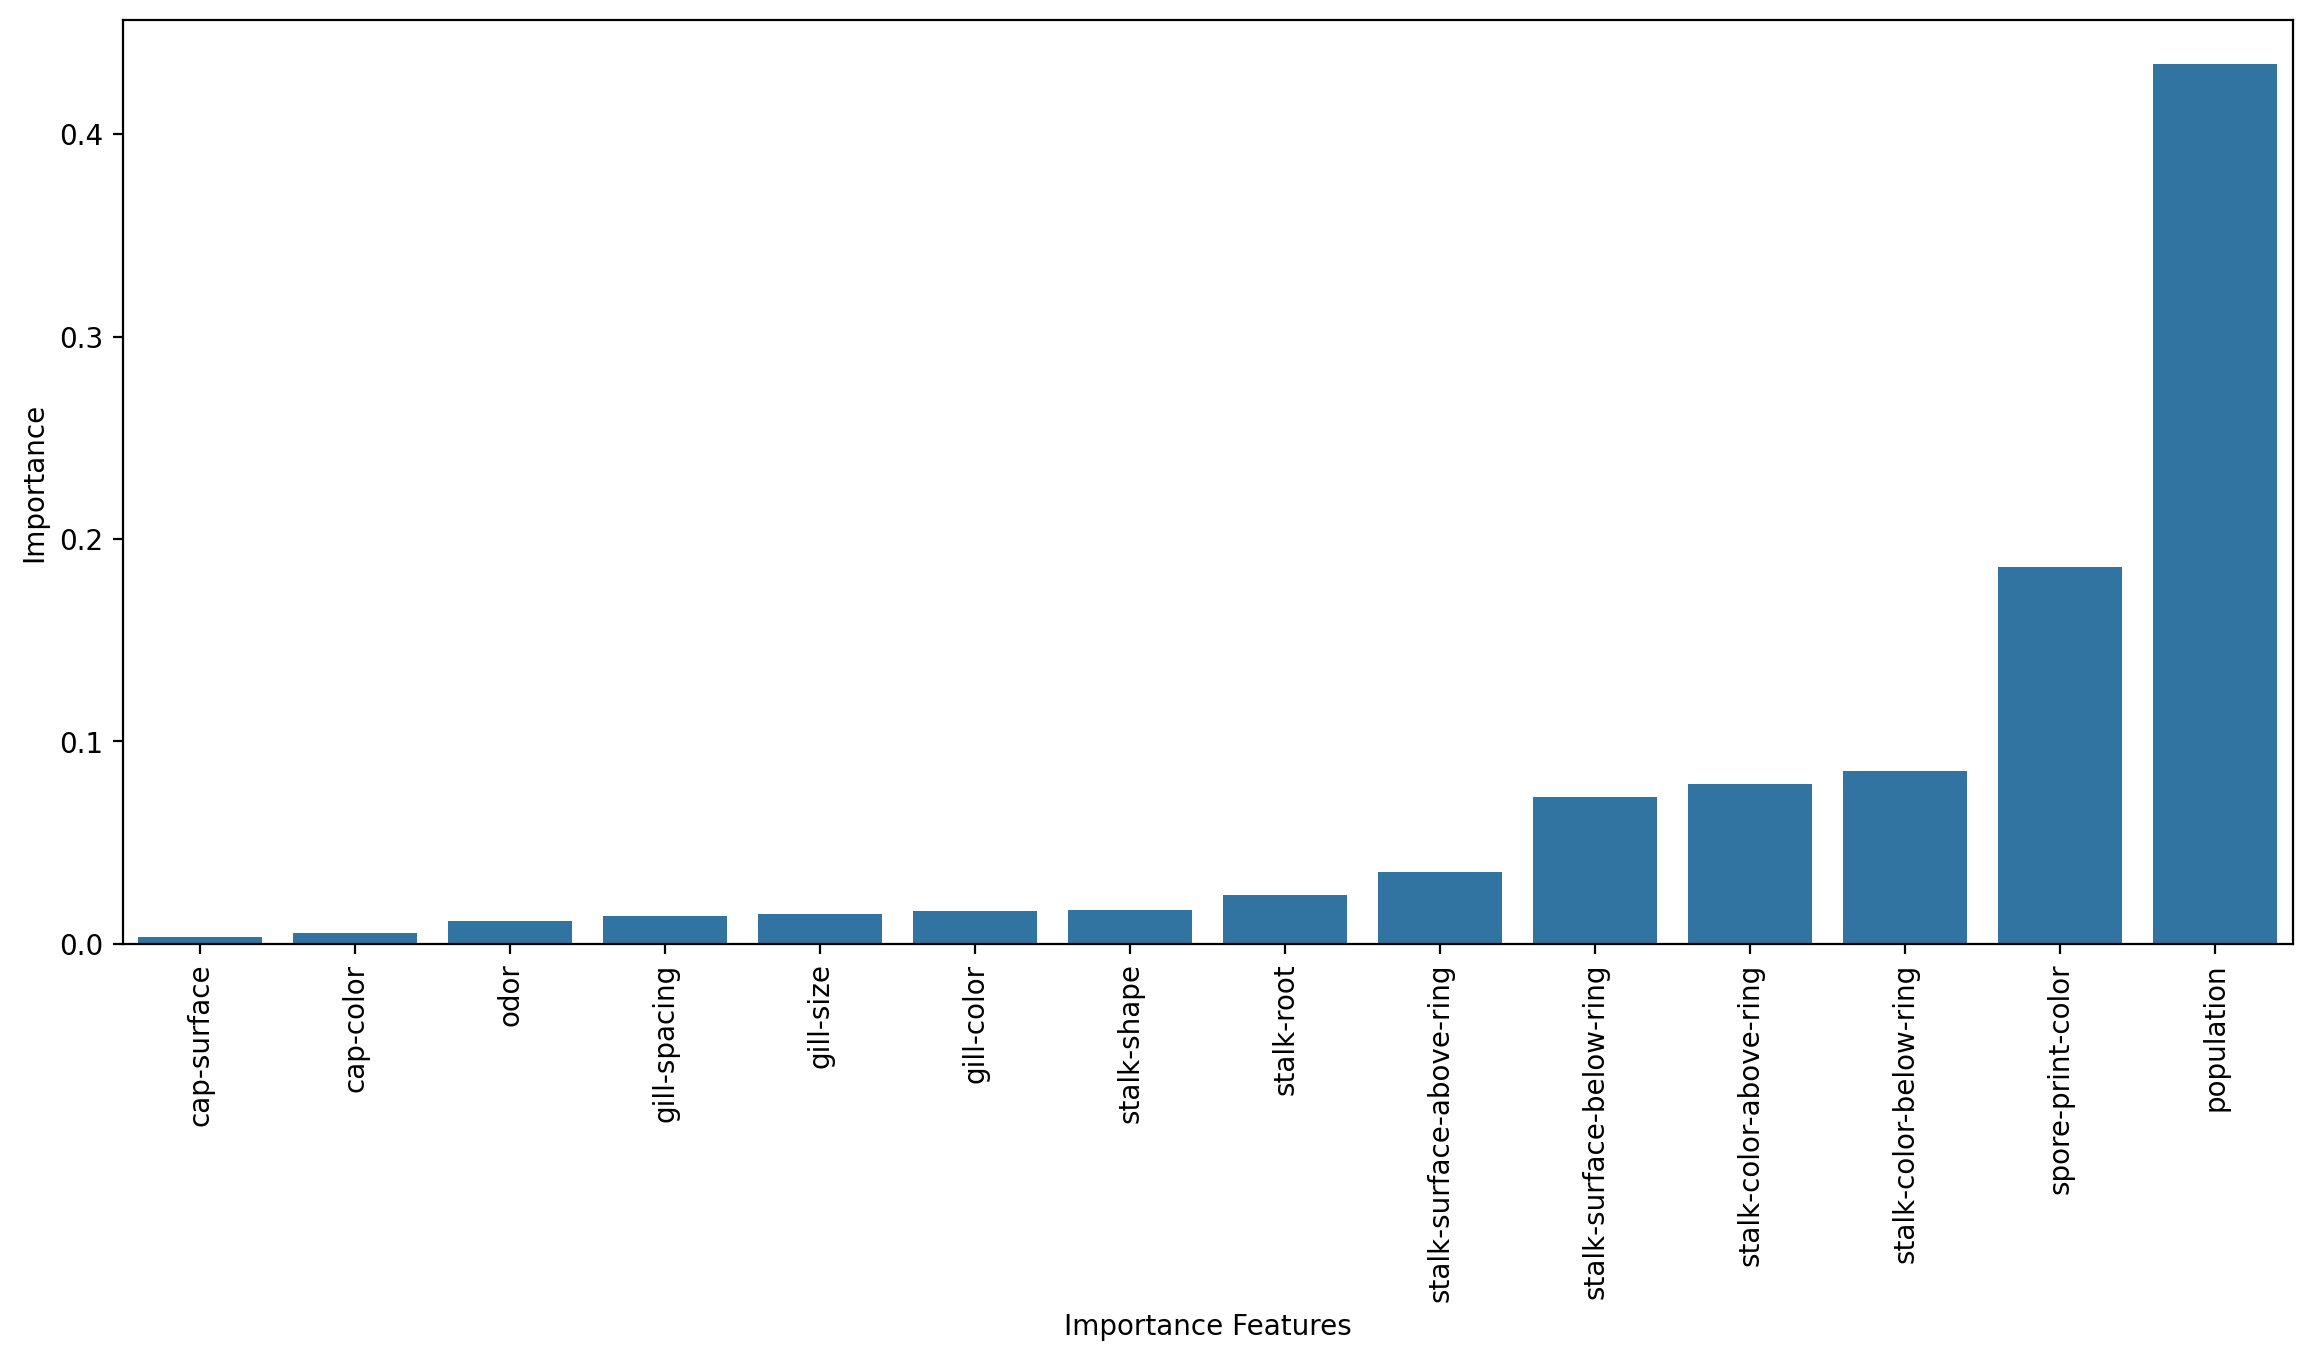

array([[820,   0],
       [  5, 800]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       820
           1       1.00      0.99      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

